# Testrun Start Signals

In [1]:
import sys
from pathlib import Path

ROOT_DIR = Path().absolute().parent 

sys.path.insert(0, str(ROOT_DIR))

TEST_IMAGES_BASE = ROOT_DIR / "tests" / "images"

In [2]:
import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from hns.core import HNS, SignalType

train = HNS(ROOT_DIR / "configs/stable.ini")

Using TensorFlow backend.


2019-07-07 10:48:56,346 hns.HNS [INFO]: Created HNS from config /home/tuxtimo/hslu/modules/hslu-pren-fs19/configs/stable.ini
2019-07-07 10:48:56,347 hns.Camera [INFO]: Using Camera settings: resolution=320x192, rotation=180, shutter_speed=150, iso=600
2019-07-07 10:48:56,348 hns.Camera [INFO]: Initializing camera ...
2019-07-07 10:48:58,352 hns.Camera [INFO]: Camera initialized
2019-07-07 10:48:58,354 hns.SignalDetector [INFO]: Using canny settings: threshold1=120, threshold2=250, aperture size=3
2019-07-07 10:48:58,356 hns.SignalDetector [INFO]: Using box detection settings: min box size=2
2019-07-07 10:48:58,359 hns.SignalDetector [INFO]: Using start signal settings: template=templates/startsignal_v3.jpg, match confidence=0.69
2019-07-07 10:48:58,448 hns.AsyncInfosignalDetector [INFO]: Using AsyncInfosignalDetector settings: number_of_workers=1
2019-07-07 10:48:58,479 hns.DigitDetector [INFO]: Using model=/home/tuxtimo/hslu/modules/hslu-pren-fs19/hns/models/numbers.h5
2019-07-07 10:4

In [4]:
TEST_RUN_DIR = TEST_IMAGES_BASE / "track"

In [5]:
def get_frame_images(root_dir):
    def sort(path):
        return int(path.stem.split("-")[-1])
    
    for image_path in sorted((p for p in root_dir.glob("*.jpg")), key=sort):
        yield image_path

## Test START Signals

In [6]:
import logging

from hns.logger import get_component_logger

get_component_logger("SignalDetector").setLevel(logging.INFO)

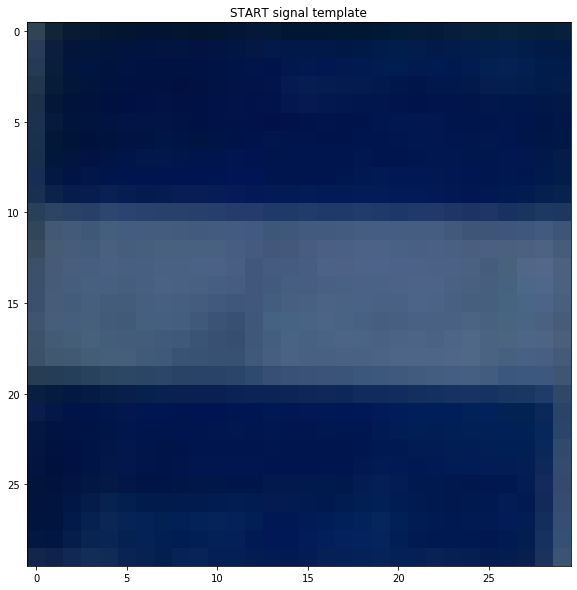

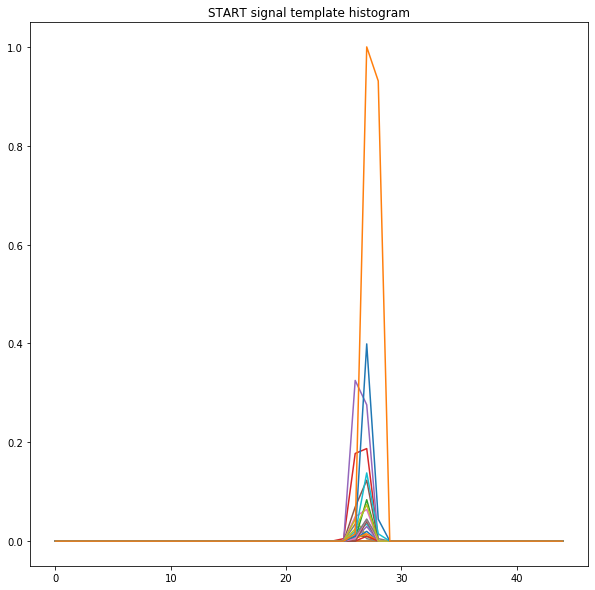

In [18]:
plt.figure(figsize=(10, 10))
plt.title("START signal template")
plt.imshow(cv2.cvtColor(train.signal_detector._SignalDetector__startsignal_template, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10, 10))
plt.title("START signal template histogram")
plt.plot(train.signal_detector._SignalDetector__startsignal_template_hist)
plt.show()

2019-07-07 11:00:27,731 hns.SignalDetector [INFO]: Found start signal at (100, 30) with bhatt distance of 0.622885 in confidence 0.690000


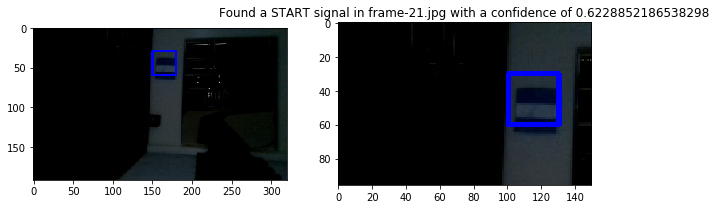

2019-07-07 11:00:28,047 hns.SignalDetector [INFO]: Found start signal at (90, 20) with bhatt distance of 0.617484 in confidence 0.690000


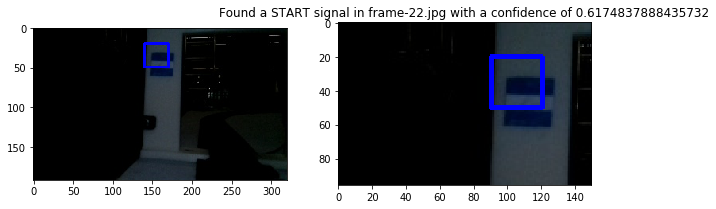

2019-07-07 11:00:28,377 hns.SignalDetector [INFO]: Found start signal at (80, 10) with bhatt distance of 0.611216 in confidence 0.690000


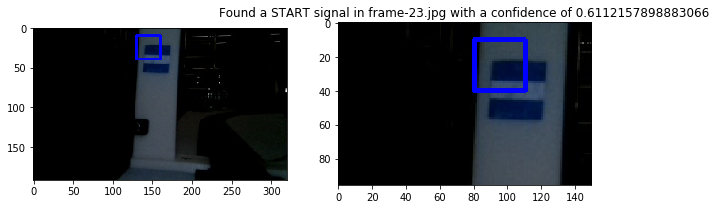

2019-07-07 11:00:28,707 hns.SignalDetector [INFO]: Found start signal at (70, 0) with bhatt distance of 0.631631 in confidence 0.690000


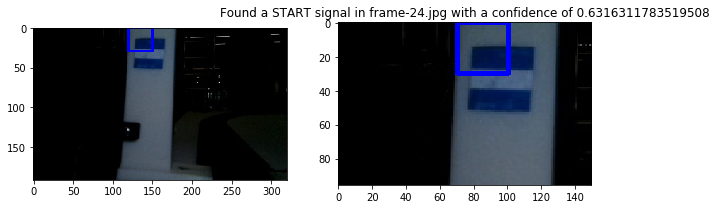

2019-07-07 11:00:29,038 hns.SignalDetector [INFO]: Found start signal at (50, 0) with bhatt distance of 0.542110 in confidence 0.690000


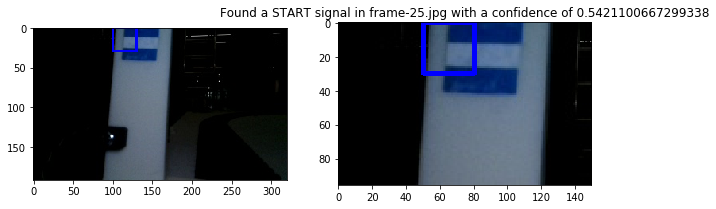

2019-07-07 11:00:29,367 hns.SignalDetector [INFO]: Found start signal at (30, 0) with bhatt distance of 0.679450 in confidence 0.690000


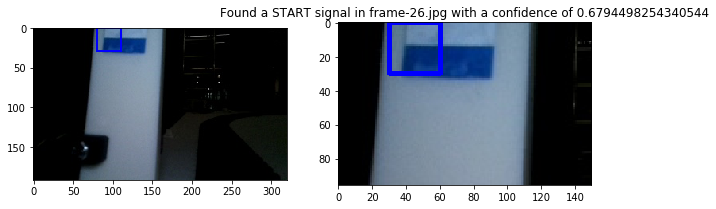

2019-07-07 11:00:30,027 hns.SignalDetector [INFO]: Found start signal at (100, 40) with bhatt distance of 0.653944 in confidence 0.690000


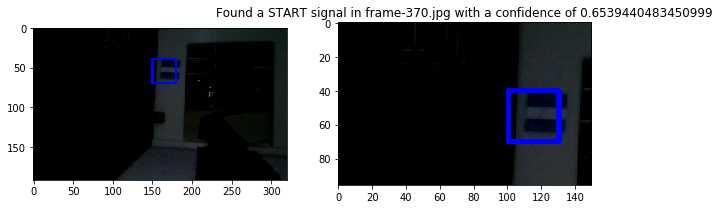

2019-07-07 11:00:30,396 hns.SignalDetector [INFO]: Found start signal at (100, 30) with bhatt distance of 0.575497 in confidence 0.690000


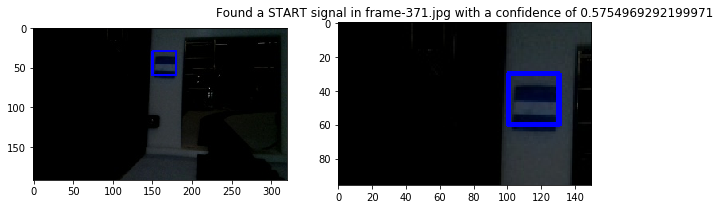

2019-07-07 11:00:30,738 hns.SignalDetector [INFO]: Found start signal at (90, 20) with bhatt distance of 0.646991 in confidence 0.690000


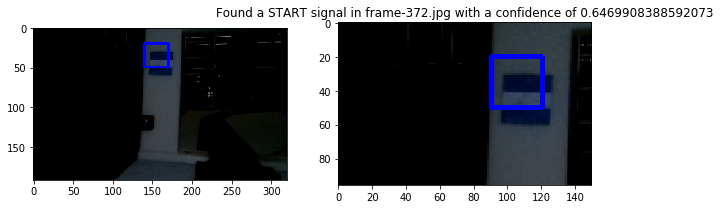

2019-07-07 11:00:31,109 hns.SignalDetector [INFO]: Found start signal at (80, 10) with bhatt distance of 0.579598 in confidence 0.690000


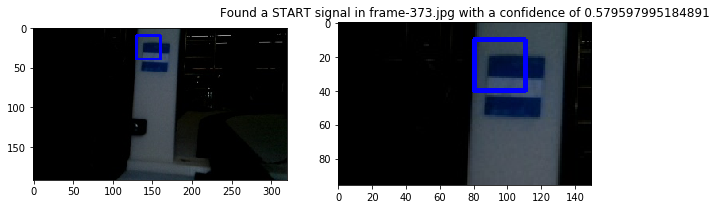

2019-07-07 11:00:31,436 hns.SignalDetector [INFO]: Found start signal at (70, 0) with bhatt distance of 0.565472 in confidence 0.690000


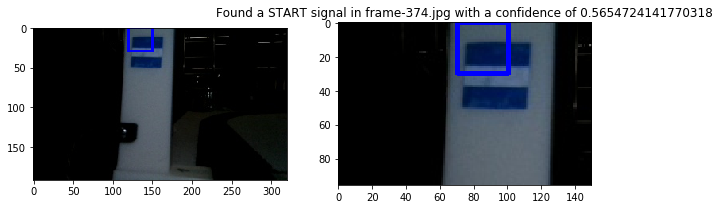

2019-07-07 11:00:31,773 hns.SignalDetector [INFO]: Found start signal at (50, 0) with bhatt distance of 0.574164 in confidence 0.690000


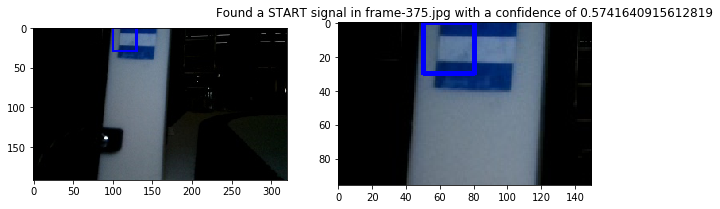

2019-07-07 11:00:32,382 hns.SignalDetector [INFO]: Found start signal at (110, 40) with bhatt distance of 0.675996 in confidence 0.690000


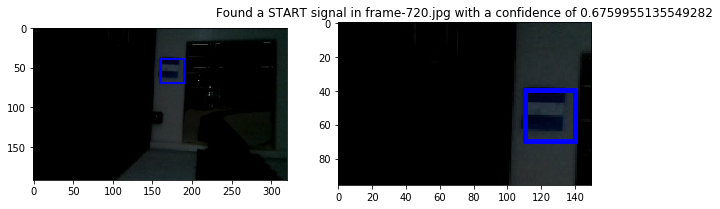

2019-07-07 11:00:32,699 hns.SignalDetector [INFO]: Found start signal at (100, 20) with bhatt distance of 0.643331 in confidence 0.690000


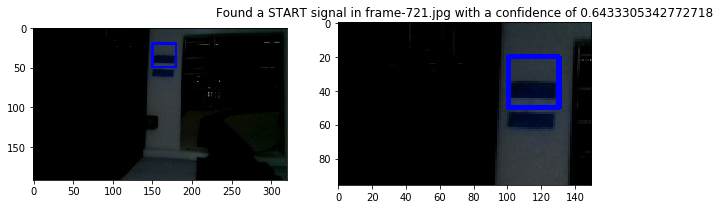

2019-07-07 11:00:33,156 hns.SignalDetector [INFO]: Found start signal at (90, 10) with bhatt distance of 0.674250 in confidence 0.690000


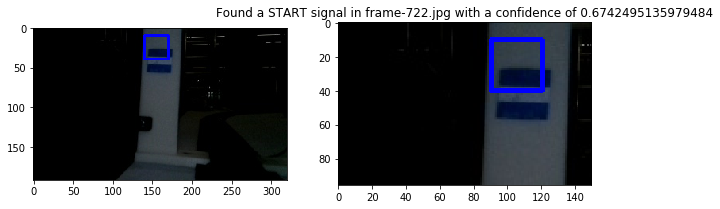

2019-07-07 11:00:33,504 hns.SignalDetector [INFO]: Found start signal at (80, 10) with bhatt distance of 0.602866 in confidence 0.690000


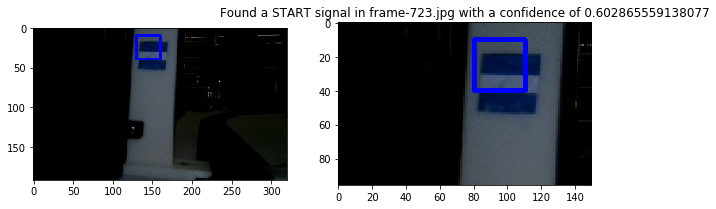

2019-07-07 11:00:33,839 hns.SignalDetector [INFO]: Found start signal at (60, 0) with bhatt distance of 0.631722 in confidence 0.690000


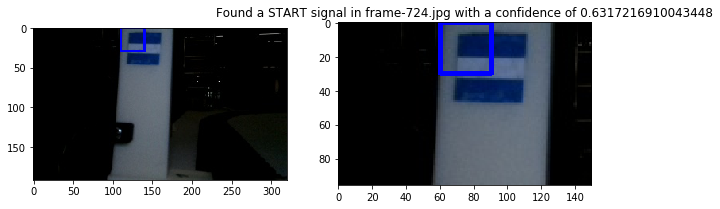

2019-07-07 11:00:34,196 hns.SignalDetector [INFO]: Found start signal at (50, 0) with bhatt distance of 0.617390 in confidence 0.690000


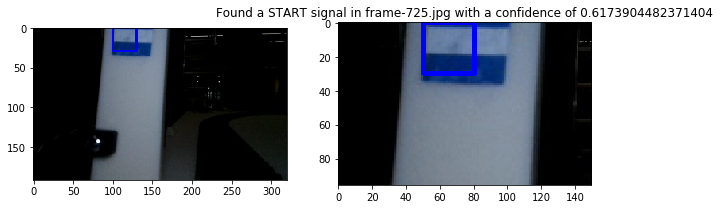

In [19]:
for image_path in get_frame_images(TEST_RUN_DIR):
    try:
        image = cv2.imread(str(image_path))
        signal = train.signal_detector.crop_and_detect(image, signal_types=[SignalType.START_SIGNAL])

        if signal is None:
            continue
            
        top_left = signal.data[1]
        w, h = train.signal_detector._SignalDetector__startsignal_template.shape[:2]
        bottom_right = (top_left[0] + h, top_left[1] + w)
        result_image = signal.image[:, 50:200]
        cv2.rectangle(result_image, top_left, bottom_right, (255, 0, 0), 2)

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.subplot(1, 2, 2)
        plt.title("Found a START signal in {} with a confidence of {}".format(image_path.name, signal.data[0]))
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.show()
    except Exception as exc:
        print("Failed to detect start signal or image in", image_path.name, exc)